In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
%matplotlib inline

# 5 Application of detection and kinematical related cuts
Aug 30, 2017

In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/ApplicationOfCuts/'

# pairs of tracks at close proximity

In [3]:
MCbnbMCcosmicPairsFV, MCbnbMCcosmicSamples = load_MCbnbMCcosmicSamples()
# pur_eff,pur_eff_numbers = apply_cuts(PIDa_p_min=8)

138749 pairs from MC-BNB + cosmic MC overlay
95676 pairs in FV
19573 are 1mu-1p, 20.5%
16269 are other pairs, 17.0%
59944 are cosmic, 62.7%
--------------------------------------------------------------
7561 are CC 1p 0pi, 7.9%


In [4]:
MCbnbDATAcosmicPairsFV, MCbnbDATAcosmicSamples = load_MCbnbDATAcosmicSamples()

50859 pairs from MC-BNB + cosmic DATA overlay
30325 pairs in FV
3806 are 1mu-1p, 12.6%
3995 are other pairs, 13.2%
22524 are cosmic, 74.3%
--------------------------------------------------------------
1232 are CC 1p 0pi, 4.1%


In [9]:
reduced_MCbnbDATAcosmicSamples=dict(dict())
reduced_MCbnbMCcosmicSamples=dict(dict())
pureff_MCbnbMCcosmic = pd.DataFrame()
pureff_MCbnbMCcosmic_numbers = pd.DataFrame()


      
# ------------------------------------------------
# Sep-9, 2017
def get_pureff_MCbnbMCcosmic_cut(cut_name = 'PIDa', cut_label=None , reduced_MCbnbMCcosmic = dict()):
    '''
        return
        eff (mu-p) , pur (mu-p), eff (CC 1p 0pi) , pur (CC 1p 0pi)
        '''
    
    global pureff_MCbnbMCcosmic
    eff = dict()
    pur = dict()
    Nreduced_MCbnbMCcosmic , freduced_MCbnbMCcosmic = get_Nreduced_MCbnbMCcosmic(reduced_MCbnbMCcosmic=reduced_MCbnbMCcosmic)
    Ntot = (Nreduced_MCbnbMCcosmic['1mu-1p']+Nreduced_MCbnbMCcosmic['cosmic']+Nreduced_MCbnbMCcosmic['other pairs'])
    
    eff['1mu-1p'] = freduced_MCbnbMCcosmic['1mu-1p']
    pur['1mu-1p'] = 100.*Nreduced_MCbnbMCcosmic['1mu-1p']/Ntot if Ntot>0 else 0
    
    eff['CC 1p 0pi'] = freduced_MCbnbMCcosmic['CC 1p 0pi']
    pur['CC 1p 0pi'] = 100.*Nreduced_MCbnbMCcosmic['CC 1p 0pi']/Ntot if Ntot>0 else 0
    
    pureff_MCbnbMCcosmic_cut = pd.DataFrame({'label':cut_label
                                              ,'$\mu p$ eff.':'%.1f'%eff['1mu-1p']+'%'
                                              ,'$\mu p$ pur.':'%.1f'%pur['1mu-1p']+'%'
                                              ,'CC$0\pi 1 p$ eff.':'%.1f'%freduced_MCbnbMCcosmic['CC 1p 0pi']+'%'
                                              ,'CC$0\pi 1 p$ pur.':'%.1f'%(100.*Nreduced_MCbnbMCcosmic['CC 1p 0pi']/Ntot if Ntot>0 else 0)+'%'}
                                              , index=[cut_name]
                                              )
    for pair_type in pair_types: pureff_MCbnbMCcosmic_cut[pair_type] = '%.1f'%freduced_MCbnbMCcosmic[pair_type]+'%' +' (%.0f)'%Nreduced_MCbnbMCcosmic[pair_type]
    pureff_MCbnbMCcosmic = pureff_MCbnbMCcosmic.append(pureff_MCbnbMCcosmic_cut)
    reduced_MCbnbMCcosmicSamples[cut_name] = reduced_MCbnbMCcosmic
    Ntot = Nreduced_MCbnbMCcosmic['1mu-1p']+Nreduced_MCbnbMCcosmic['cosmic']+Nreduced_MCbnbMCcosmic['other pairs']
    return freduced_MCbnbMCcosmic['1mu-1p'],(100.*Nreduced_MCbnbMCcosmic['1mu-1p']/Ntot if Ntot>0 else 0),freduced_MCbnbMCcosmic['CC 1p 0pi'],(100.*Nreduced_MCbnbMCcosmic['CC 1p 0pi']/Ntot if Ntot>0 else 0)
# ------------------------------------------------

    
# ------------------------------------------------
# Aug-30, 2017
def get_pureff_MCbnbDATAcosmic_cut(cut_name = 'PIDa', cut_label=None , reduced_MCbnbDATAcosmic = dict()):
    ''' 
        return
        eff (mu-p) , pur (mu-p), eff (CC 1p 0pi) , pur (CC 1p 0pi)
    '''
    
    global pureff_MCbnbDATAcosmic
    eff = dict()
    pur = dict()
    Nreduced_MCbnbDATAcosmic , freduced_MCbnbDATAcosmic = get_Nreduced_MCbnbDATAcosmic(reduced_MCbnbDATAcosmic=reduced_MCbnbDATAcosmic)
    Ntot = (Nreduced_MCbnbDATAcosmic['1mu-1p']+Nreduced_MCbnbDATAcosmic['cosmic']+Nreduced_MCbnbDATAcosmic['other pairs'])
    
    eff['1mu-1p'] = freduced_MCbnbDATAcosmic['1mu-1p']
    pur['1mu-1p'] = 100.*Nreduced_MCbnbDATAcosmic['1mu-1p']/Ntot if Ntot>0 else 0
    
    eff['CC 1p 0pi'] = freduced_MCbnbDATAcosmic['CC 1p 0pi']
    pur['CC 1p 0pi'] = 100.*Nreduced_MCbnbDATAcosmic['CC 1p 0pi']/Ntot if Ntot>0 else 0
    
    pureff_MCbnbDATAcosmic_cut = pd.DataFrame({'label':cut_label
                               ,'$\mu p$ eff.':'%.1f'%eff['1mu-1p']+'%'
                               ,'$\mu p$ pur.':'%.1f'%pur['1mu-1p']+'%'
                               ,'CC$0\pi 1 p$ eff.':'%.1f'%freduced_MCbnbDATAcosmic['CC 1p 0pi']+'%'
                               ,'CC$0\pi 1 p$ pur.':'%.1f'%(100.*Nreduced_MCbnbDATAcosmic['CC 1p 0pi']/Ntot if Ntot>0 else 0)+'%'}
                               , index=[cut_name]
                              )
    for pair_type in pair_types: pureff_MCbnbDATAcosmic_cut[pair_type] = '%.1f'%freduced_MCbnbDATAcosmic[pair_type]+'%' +' (%.0f)'%Nreduced_MCbnbDATAcosmic[pair_type]
    pureff_MCbnbDATAcosmic = pureff_MCbnbDATAcosmic.append(pureff_MCbnbDATAcosmic_cut)
    reduced_MCbnbDATAcosmicSamples[cut_name] = reduced_MCbnbDATAcosmic  
    Ntot = Nreduced_MCbnbDATAcosmic['1mu-1p']+Nreduced_MCbnbDATAcosmic['cosmic']+Nreduced_MCbnbDATAcosmic['other pairs']
    return freduced_MCbnbDATAcosmic['1mu-1p'],(100.*Nreduced_MCbnbDATAcosmic['1mu-1p']/Ntot if Ntot>0 else 0),freduced_MCbnbDATAcosmic['CC 1p 0pi'],(100.*Nreduced_MCbnbDATAcosmic['CC 1p 0pi']/Ntot if Ntot>0 else 0)
# ------------------------------------------------

# ------------------------------------------------
# Sep-9, 2017
def get_pureff_MCbnbMCcosmic_numbers(cut_name = 'PIDa', cut_label=None , reduced_MCbnbMCcosmic = dict()):
    global pureff_MCbnbMCcosmic_numbers
    Nreduced_MCbnbMCcosmic , freduced_MCbnbMCcosmic = get_Nreduced_MCbnbMCcosmic(reduced_MCbnbMCcosmic=reduced_MCbnbMCcosmic)
    Ntot = Nreduced_MCbnbMCcosmic['cosmic']+Nreduced_MCbnbMCcosmic['other pairs']+Nreduced_MCbnbMCcosmic['1mu-1p']
    pureff_MCbnbMCcosmic_numbers_cut = pd.DataFrame({'cut name':cut_name,
                                                      'cut label':cut_label,
                                                      'cosmic':Nreduced_MCbnbMCcosmic['cosmic'],
                                                      'other pairs':Nreduced_MCbnbMCcosmic['other pairs'],
                                                      '\mup':Nreduced_MCbnbMCcosmic['1mu-1p'],
                                                      '\CCIpOpi':Nreduced_MCbnbMCcosmic['CC 1p 0pi'],
                                                      'eff \mup':freduced_MCbnbMCcosmic['1mu-1p'],
                                                      'eff \CCIpOpi':freduced_MCbnbMCcosmic['CC 1p 0pi'],
                                                      'pur \mup':float(100*Nreduced_MCbnbMCcosmic['1mu-1p'])/Ntot if Ntot>0 else 0,
                                                      'pur \CCIpOpi':float(100*Nreduced_MCbnbMCcosmic['CC 1p 0pi'])/Ntot if Ntot>0 else 0}
                                                      , index=[cut_name]
                                                      )
    pureff_MCbnbMCcosmic_numbers = pureff_MCbnbMCcosmic_numbers.append(pureff_MCbnbMCcosmic_numbers_cut)
# ------------------------------------------------


# ------------------------------------------------
# Aug-30, 2017
def get_pureff_MCbnbDATAcosmic_numbers(cut_name = 'PIDa', cut_label=None , reduced_MCbnbDATAcosmic = dict()):
    global pureff_MCbnbDATAcosmic_numbers
    Nreduced_MCbnbDATAcosmic , freduced_MCbnbDATAcosmic = get_Nreduced_MCbnbDATAcosmic(reduced_MCbnbDATAcosmic=reduced_MCbnbDATAcosmic)
    Ntot = Nreduced_MCbnbDATAcosmic['cosmic']+Nreduced_MCbnbDATAcosmic['other pairs']+Nreduced_MCbnbDATAcosmic['1mu-1p']
    pureff_MCbnbDATAcosmic_numbers_cut = pd.DataFrame({'cut name':cut_name,
                                       'cut label':cut_label,
                                        'cosmic':Nreduced_MCbnbDATAcosmic['cosmic'],                                
                                        'other pairs':Nreduced_MCbnbDATAcosmic['other pairs'],                                
                                        '\mup':Nreduced_MCbnbDATAcosmic['1mu-1p'],                               
                                        '\CCIpOpi':Nreduced_MCbnbDATAcosmic['CC 1p 0pi'],
                                        'eff \mup':freduced_MCbnbDATAcosmic['1mu-1p'],                               
                                        'eff \CCIpOpi':freduced_MCbnbDATAcosmic['CC 1p 0pi'],
                                        'pur \mup':float(100*Nreduced_MCbnbDATAcosmic['1mu-1p'])/Ntot if Ntot>0 else 0,
                                        'pur \CCIpOpi':float(100*Nreduced_MCbnbDATAcosmic['CC 1p 0pi'])/Ntot if Ntot>0 else 0}
                                       , index=[cut_name]
                                      )
    pureff_MCbnbDATAcosmic_numbers = pureff_MCbnbDATAcosmic_numbers.append(pureff_MCbnbDATAcosmic_numbers_cut)
# ------------------------------------------------





# ------------------------------------------------
# last edit Oct-3, 2017
def apply_cuts( PIDa_p_min=12
               , delta_theta_12=60  # deg.
               , delta_Delta_phi=40 # deg.
               , theta_pq_max=25    # deg.
               , Pt_max=0.35        # GeV/c
               , opt_box=(50,100) # [Nwires x Nticks]
               , r_min_RdQ_CC1p0pi = 0.32 # sphere in U,V,Y space, apply a cut only to CC1p0pi
               , min_PE_ClosestFlash = 50
               , max_dYZ_ClosestFlash = 150
               ):
    '''
        return:
        
            pureff_MCbnbDATAcosmic
            pureff_MCbnbDATAcosmic_numbers
            pureff_MCbnbMCcosmic
            pureff_MCbnbMCcosmic_numbers
    '''
    # --- -- --- - -- -- --- --
    reduced_MCbnbDATAcosmic = dict()
    reduced_MCbnbMCcosmic = dict()
    for pair_type in pair_types:#{
        reduced_MCbnbDATAcosmic[pair_type] = MCbnbDATAcosmicSamples[pair_type]
        reduced_MCbnbMCcosmic[pair_type] = MCbnbMCcosmicSamples[pair_type]
    #}
    reduced_MCbnbDATAcosmicSamples['no cut'] = reduced_MCbnbDATAcosmic
    reduced_MCbnbMCcosmicSamples['no cut'] = reduced_MCbnbMCcosmic

    # before cuts
    reduced_MCbnbDATAcosmic = dict()
    reduced_MCbnbMCcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_MCbnbDATAcosmicSamples['no cut'][pair_type]
        reduced_MCbnbDATAcosmic[pair_type] = sam
        sam = reduced_MCbnbMCcosmicSamples['no cut'][pair_type]
        reduced_MCbnbMCcosmic[pair_type] = sam
    #}
    get_pureff_MCbnbDATAcosmic_cut(cut_name = 'no cut', reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbDATAcosmic_numbers(cut_name = 'no cut', reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbMCcosmic_cut(cut_name = 'no cut', reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)
    get_pureff_MCbnbMCcosmic_numbers(cut_name = 'no cut', reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)


    # cut 1: PIDa
    cut_name , cut_label = 'PIDa','${PID}_a>%.0f$'%PIDa_p_min
    reduced_MCbnbDATAcosmic = dict()
    reduced_MCbnbMCcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_MCbnbDATAcosmicSamples['no cut'][pair_type]
        reduced_MCbnbDATAcosmic[pair_type] = sam[sam['PIDa_assigned_proton']>PIDa_p_min]
        sam = reduced_MCbnbMCcosmicSamples['no cut'][pair_type]
        reduced_MCbnbMCcosmic[pair_type] = sam[sam['PIDa_assigned_proton']>PIDa_p_min]
    #}
    get_pureff_MCbnbDATAcosmic_cut(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbDATAcosmic_numbers(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbMCcosmic_cut(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)
    get_pureff_MCbnbMCcosmic_numbers(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)


    # cut 2: require that the longer track is the one with larger PIDa
    cut_name , cut_label = 'length', '$l_{\\mu}>l_{p}$'
    reduced_MCbnbDATAcosmic = dict()
    reduced_MCbnbMCcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_MCbnbDATAcosmicSamples['PIDa'][pair_type]
        reduced_MCbnbDATAcosmic[pair_type] = sam[sam['PIDa_long'] < sam['PIDa_short']]
        sam = reduced_MCbnbMCcosmicSamples['PIDa'][pair_type]
        reduced_MCbnbMCcosmic[pair_type] = sam[sam['PIDa_long'] < sam['PIDa_short']]
    #}
    get_pureff_MCbnbDATAcosmic_cut(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbDATAcosmic_numbers(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbMCcosmic_cut(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)
    get_pureff_MCbnbMCcosmic_numbers(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)
    
    # cut 3: |\theta_{1,2}-90^0|<60^0$
    cut_name, cut_label='non-collinearity' ,'$|\theta_{1,2}-90^0|<%.0f^0$'%delta_theta_12
    reduced_MCbnbDATAcosmic = dict()
    reduced_MCbnbMCcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_MCbnbDATAcosmicSamples['length'][pair_type]
        reduced_MCbnbDATAcosmic[pair_type] = sam[np.abs(sam['theta_12']-90)<delta_theta_12]
        sam = reduced_MCbnbMCcosmicSamples['length'][pair_type]
        reduced_MCbnbMCcosmic[pair_type] = sam[np.abs(sam['theta_12']-90)<delta_theta_12]
    #}
    get_pureff_MCbnbDATAcosmic_cut(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbDATAcosmic_numbers(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbMCcosmic_cut(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)
    get_pureff_MCbnbMCcosmic_numbers(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)


    # -- - -- -- - -- -- - - -- --- 
    # FLASH A: look at the closest flash to the vertex
    # -- - -- -- - -- -- - - -- --- 
    # cut 4: number of photoelectrons in the closest flash to the vertex (ClosestFlash_TotalPE)
    cut_name, cut_label='closest-flash PE' ,'$N_{PE}^{closest-flash}>%.0f$'%min_PE_ClosestFlash
    reduced_MCbnbDATAcosmic = dict()
    reduced_MCbnbMCcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_MCbnbDATAcosmicSamples['non-collinearity'][pair_type]
        reduced_MCbnbDATAcosmic[pair_type] = sam[sam['ClosestFlash_TotalPE'] > min_PE_ClosestFlash]
        sam = reduced_MCbnbMCcosmicSamples['non-collinearity'][pair_type]
        reduced_MCbnbMCcosmic[pair_type] = sam[sam['ClosestFlash_TotalPE'] > min_PE_ClosestFlash]
    #}
    get_pureff_MCbnbDATAcosmic_cut(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbDATAcosmic_numbers(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbMCcosmic_cut(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)
    get_pureff_MCbnbMCcosmic_numbers(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)


    # cut 5: distance of the closest flash to the vertex in YZ plane (ClosestFlash_YZdistance)
    cut_name, cut_label='closest-flash dYZ' ,'$d_{YZ-plane}^{closest-flash}<%.0f$ cm'%max_dYZ_ClosestFlash
    reduced_MCbnbDATAcosmic = dict()
    reduced_MCbnbMCcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_MCbnbDATAcosmicSamples['closest-flash PE'][pair_type]
        reduced_MCbnbDATAcosmic[pair_type] = sam[sam['ClosestFlash_YZdistance'] < max_dYZ_ClosestFlash]
        sam = reduced_MCbnbMCcosmicSamples['closest-flash PE'][pair_type]
        reduced_MCbnbMCcosmic[pair_type] = sam[sam['ClosestFlash_YZdistance'] < max_dYZ_ClosestFlash]
    #}
    get_pureff_MCbnbDATAcosmic_cut(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbDATAcosmic_numbers(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbMCcosmic_cut(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)
    get_pureff_MCbnbMCcosmic_numbers(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)



    
    
    # -- - -- -- - -- -- - - -- --- 
    # VERTEX ACTIVITY 
    # -- - -- -- - -- -- - - -- --- 
    # cut 6: vertex activity (RdQ)
    # for the 1mu-1p sample we do not apply a cut, which means that we stop here for 1mu-1p
    # for the CC 1p 0pi we apply a cut:
    # a sphere around RdQ=1 of radius r_min_RdQ_CC1p0pi
    # where r_min_RdQ_CC1p0pi is taken from analysis_notes/RdQ/RdQaroundVertex_cut_selection
    cut_name , cut_label = 'vertex activity' , '$\sqrt{\sum_{p=0,1,2}(R_{\Delta Q}^{p}-1)^2}<%.2f$'%r_min_RdQ_CC1p0pi
    box_str='[%d wires x %d ticks]'%(opt_box[0],opt_box[1])
    Ru = 'RdQaroundVertex[plane 0]'+box_str
    Rv = 'RdQaroundVertex[plane 1]'+box_str
    Ry = 'RdQaroundVertex[plane 2]'+box_str
    
    reduced_MCbnbDATAcosmic = dict()
    reduced_MCbnbMCcosmic = dict()    
    for pair_type in pair_types:#{ 
        
        sam = reduced_MCbnbDATAcosmicSamples['non-collinearity'][pair_type]#closest-flash dYZ
        sam = sam[(sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1) 
                  | 
                  (np.sqrt( np.square(sam[Ru]-1) + np.square(sam[Rv]-1) + np.square(sam[Ry]-1) ) <= r_min_RdQ_CC1p0pi) ]
        reduced_MCbnbDATAcosmic[pair_type] = sam
        
        sam = reduced_MCbnbMCcosmicSamples['closest-flash dYZ'][pair_type]
        sam = sam[(sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1) 
                  | 
                  (np.sqrt( np.square(sam[Ru]-1) + np.square(sam[Rv]-1) + np.square(sam[Ry]-1) ) <= r_min_RdQ_CC1p0pi) ]
        reduced_MCbnbMCcosmic[pair_type] = sam
    #}
    get_pureff_MCbnbDATAcosmic_cut(cut_name=cut_name ,cut_label=cut_label , reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbDATAcosmic_numbers(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbMCcosmic_cut(cut_name=cut_name,cut_label=cut_label , reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)
    get_pureff_MCbnbMCcosmic_numbers(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)


    # cut 5: $\Delta phi$
    reduced_MCbnbDATAcosmic = dict()
    reduced_MCbnbMCcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_MCbnbDATAcosmicSamples['vertex activity'][pair_type]
        reduced_MCbnbDATAcosmic[pair_type] = sam[np.abs(sam['delta_phi']-180.)<delta_Delta_phi]
        sam = reduced_MCbnbMCcosmicSamples['vertex activity'][pair_type]
        reduced_MCbnbMCcosmic[pair_type] = sam[np.abs(sam['delta_phi']-180.)<delta_Delta_phi]
    #}
    get_pureff_MCbnbDATAcosmic_cut(cut_name = 'delta phi', cut_label='$|\Delta \phi - \pi|<%.0f^0$'%delta_Delta_phi, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbDATAcosmic_numbers(cut_name = '\CutDeltaPhi', cut_label='$|\Delta \phi - \pi|<%.0f^0$'%delta_Delta_phi, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbMCcosmic_cut(cut_name = 'delta phi', cut_label='$|\Delta \phi - \pi|<%.0f^0$'%delta_Delta_phi, reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)
    get_pureff_MCbnbMCcosmic_numbers(cut_name = '\CutDeltaPhi', cut_label='$|\Delta \phi - \pi|<%.0f^0$'%delta_Delta_phi, reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)


    # cut 6: $\theta_{pq}<25$
    reduced_MCbnbDATAcosmic = dict()
    reduced_MCbnbMCcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_MCbnbDATAcosmicSamples['delta phi'][pair_type]
        reduced_MCbnbDATAcosmic[pair_type] = sam[sam['reco_theta_pq']<theta_pq_max]
        sam = reduced_MCbnbMCcosmicSamples['delta phi'][pair_type]
        reduced_MCbnbMCcosmic[pair_type] = sam[sam['reco_theta_pq']<theta_pq_max]
    #}
    get_pureff_MCbnbDATAcosmic_cut(cut_name ='theta_pq' , cut_label= '$\theta_{pq}<%.0f^0$'%theta_pq_max, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbDATAcosmic_numbers(cut_name ='theta_pq' , cut_label= '$\\theta_{pq}<%.0f^0$'%theta_pq_max, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbMCcosmic_cut(cut_name ='theta_pq' , cut_label= '$\theta_{pq}<%.0f^0$'%theta_pq_max, reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)
    get_pureff_MCbnbMCcosmic_numbers(cut_name ='theta_pq' , cut_label= '$\\theta_{pq}<%.0f^0$'%theta_pq_max, reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)


    # modified cut 6: $p_{t}<0.35$
    reduced_MCbnbDATAcosmic = dict()
    reduced_MCbnbMCcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_MCbnbDATAcosmicSamples['delta phi'][pair_type]
        reduced_MCbnbDATAcosmic[pair_type] = sam[sam['reco_Pt']<Pt_max]
        sam = reduced_MCbnbMCcosmicSamples['delta phi'][pair_type]
        reduced_MCbnbMCcosmic[pair_type] = sam[sam['reco_Pt']<Pt_max]
    #}
    get_pureff_MCbnbDATAcosmic_cut(cut_name='soft Pt', cut_label='$p_{t}<%.2f$ GeV/c'%Pt_max, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbDATAcosmic_numbers(cut_name='soft Pt', cut_label='$p_{t}<%.2f$ GeV/c'%Pt_max, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbMCcosmic_cut(cut_name='soft Pt', cut_label='$p_{t}<%.2f$ GeV/c'%Pt_max, reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)
    get_pureff_MCbnbMCcosmic_numbers(cut_name='soft Pt', cut_label='$p_{t}<%.2f$ GeV/c'%Pt_max, reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)


    # tight Pt cut for good Ev reconstruction
    reduced_MCbnbDATAcosmic = dict()
    reduced_MCbnbMCcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_MCbnbDATAcosmicSamples['theta_pq'][pair_type]
        reduced_MCbnbDATAcosmic[pair_type] = sam[sam['reco_Pt']<0.15]
        sam = reduced_MCbnbMCcosmicSamples['theta_pq'][pair_type]
        reduced_MCbnbMCcosmic[pair_type] = sam[sam['reco_Pt']<0.15]
    #}
    get_pureff_MCbnbDATAcosmic_cut(cut_name ='tight Pt', cut_label= '$p_{t}<0.15$ GeV/c', reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbDATAcosmic_numbers(cut_name ='tight Pt', cut_label= '$p_{t}<0.15$ GeV/c', reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbMCcosmic_cut(cut_name ='tight Pt', cut_label= '$p_{t}<0.15$ GeV/c', reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)
    get_pureff_MCbnbMCcosmic_numbers(cut_name ='tight Pt', cut_label= '$p_{t}<0.15$ GeV/c', reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)



    return pureff_MCbnbDATAcosmic,pureff_MCbnbDATAcosmic_numbers,pureff_MCbnbMCcosmic,pureff_MCbnbMCcosmic_numbers
# ------------------------------------------------

In [10]:
cuts_pureff = apply_cuts(PIDa_p_min=12,                                                                             
                         min_PE_ClosestFlash = 300,                         
                         max_dYZ_ClosestFlash = 150,
                         delta_Delta_phi=40,                         
                         r_min_RdQ_CC1p0pi=0.42)
pureff_MCbnbDATAcosmic,pureff_MCbnbDATAcosmic_numbers,pureff_MCbnbMCcosmic,pureff_MCbnbMCcosmic_numbers = cuts_pureff

In [11]:
pureff_MCbnbMCcosmic

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,20.4%,100.0%,7.9%,None,100.0% (19573),100.0% (16269),100.0% (59944),100.0% (7561)
PIDa,82.3%,40.6%,80.1%,15.3%,${PID}_a>12$,82.3% (16111),53.4% (8689),24.8% (14886),80.1% (6057)
length,67.8%,51.0%,69.7%,20.2%,$l_{\mu}>l_{p}$,67.8% (13280),29.6% (4817),13.3% (7956),69.7% (5270)
non-collinearity,62.8%,60.5%,67.2%,25.0%,"$|\theta_{1,2}-90^0|<60^0$",62.8% (12286),22.8% (3702),7.2% (4334),67.2% (5083)
closest-flash PE,58.6%,67.2%,62.6%,27.7%,$N_{PE}^{closest-flash}>300$,58.6% (11467),21.2% (3446),3.6% (2145),62.6% (4730)
closest-flash dYZ,52.3%,70.1%,55.1%,28.6%,$d_{YZ-plane}^{closest-flash}<150$ cm,52.3% (10230),19.9% (3237),1.9% (1126),55.1% (4167)
vertex activity,37.3%,72.5%,49.6%,37.2%,"$\sqrt{\sum_{p=0,1,2}(R_{\Delta Q}^{p}-1)^2}<0...",37.3% (7303),12.6% (2053),1.2% (724),49.6% (3751)
delta phi,25.3%,85.6%,43.6%,56.9%,$|\Delta \phi - \pi|<40^0$,25.3% (4959),3.4% (555),0.5% (281),43.6% (3298)
theta_pq,17.8%,93.2%,34.5%,69.9%,$\theta_{pq}<25^0$,17.8% (3479),1.1% (187),0.1% (67),34.5% (2610)
soft Pt,21.8%,89.6%,39.5%,62.7%,$p_{t}<0.35$ GeV/c,21.8% (4269),2.0% (333),0.3% (161),39.5% (2988)


In [8]:
pureff_MCbnbDATAcosmic

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,12.6%,100.0%,4.1%,None,100.0% (3806),100.0% (3995),100.0% (22524),100.0% (1232)
PIDa,79.9%,45.6%,76.1%,14.0%,${PID}_a>12$,79.9% (3040),38.4% (1534),9.3% (2096),76.1% (937)
length,64.0%,59.4%,64.0%,19.2%,$l_{\mu}>l_{p}$,64.0% (2436),20.3% (811),3.8% (853),64.0% (788)
non-collinearity,58.5%,70.8%,61.4%,24.1%,"$|\theta_{1,2}-90^0|<60^0$",58.5% (2227),14.3% (570),1.5% (349),61.4% (757)
vertex activity,36.3%,76.7%,54.3%,37.1%,"$\sqrt{\sum_{p=0,1,2}(R_{\Delta Q}^{p}-1)^2}<0...",36.3% (1383),6.6% (264),0.7% (155),54.3% (669)
delta phi,25.1%,86.7%,48.5%,54.4%,$|\Delta \phi - \pi|<40^0$,25.1% (954),2.4% (97),0.2% (49),48.5% (598)
theta_pq,18.0%,94.9%,39.9%,67.9%,$\theta_{pq}<25^0$,18.0% (686),0.9% (37),0.0% (0),39.9% (491)
soft Pt,20.8%,93.8%,43.4%,63.3%,$p_{t}<0.35$ GeV/c,20.8% (793),1.2% (49),0.0% (3),43.4% (535)
tight Pt,9.6%,95.6%,22.6%,72.6%,$p_{t}<0.15$ GeV/c,9.6% (366),0.4% (17),0.0% (0),22.6% (278)


In [13]:
pur_eff_numbers

NameError: name 'pur_eff_numbers' is not defined

In [ ]:
# plug in table tab:FiveCuts in report (ApplicationOfCuts.tex)
print "plug in table tab:FiveCuts in report (ApplicationOfCuts.tex)"
print 
print "			\hline"
print "			cut	 					& \\textcolor{orange}{cosmic}		& \\textcolor{red}{other pairs} 		& \\textcolor{teal}{\mup} 		& \\textcolor{blue}{\CCIpOpi}  			& purity \\textcolor{teal}{\mup} (\\textcolor{blue}{\CCIpOpi}) 	& efficiency \\textcolor{teal}{\mup} (\\textcolor{blue}{\CCIpOpi}) 		\\tabularnewline"
print "\hline \hline"
for i,row in pur_eff_numbers.iterrows():    
#     print row[]
    Ncosmic = int(row['cosmic'])
    print "			"+row['cut name']+"\
    & \\textcolor{orange}{%d"%row['cosmic']+"}\
    & \\textcolor{red}{%d"%row['other pairs']+"}\
    & \\textcolor{teal}{%d"%row['\mup']+"}\
    & \\textcolor{blue}{%d"%row['\CCIpOpi']+"}\
    & \\textcolor{teal}{%.1f"%(float(row['pur \mup']))+"\%"+"}"+"(\\textcolor{blue}{%.1f"%(float(row['pur \CCIpOpi']))+"\%"+")}\
    & \\textcolor{teal}{%.1f"%(float(row['eff \mup']))+"\%"+"}"+"(\\textcolor{blue}{%.1f"%(float(row['eff \CCIpOpi']))+"\%"+")}\
    \\tabularnewline"
    print "\hline"

print
print

## 5.II The impact of the cuts on the $Q^2$ -dependence of the sample

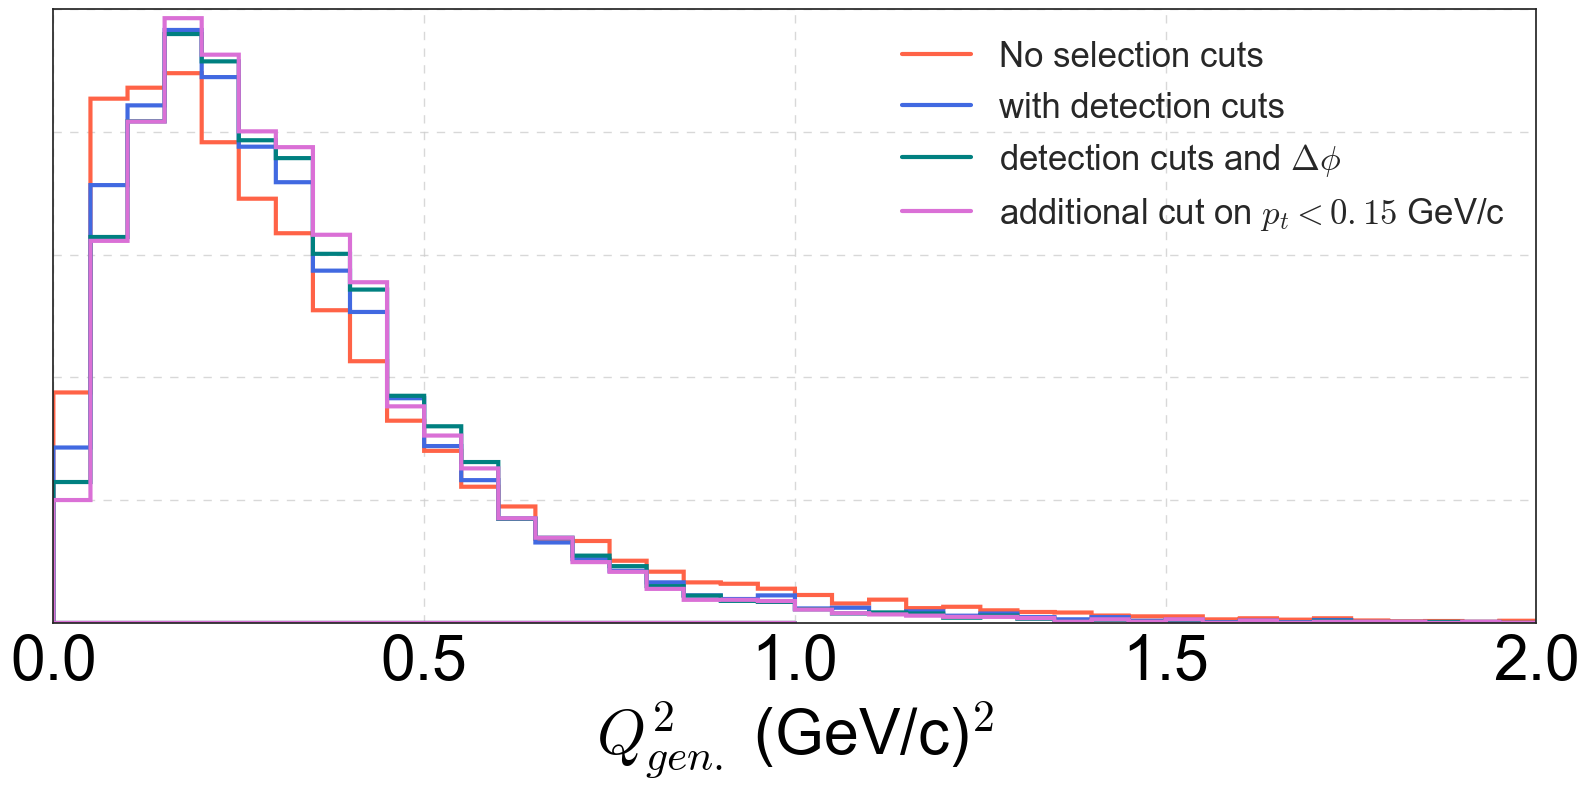

In [33]:
# Q2 before and after the cuts
bins = np.linspace(0.,2,41)
cuts   = ['no cut','vertex activity', 'delta phi' , 'soft Pt' ]                                
labels = ['No selection cuts','with detection cuts','detection cuts and $\\Delta \\phi$', 'additional cut on $p_{t}<0.15$ GeV/c']
colors = ['tomato','royalblue','teal','Orchid']

fig,ax=plt.subplots(figsize=(16,8))
for cut_name,label,color in zip(cuts,labels,colors):
    sample = reduced_MCbnbMCcosmicSamples[cut_name]['1mu-1p']
    truth_Q2 = sample['truth_Q2']
    h,bins,_=plt.hist( truth_Q2 , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    plt.plot([0,0],'-',color=color,label=label,linewidth=3)
set_axes(ax,'$Q^{2}_{gen.}$ (GeV/c)$^2$',ticks_color='black',fontsize=45,do_add_grid=True)
ax.legend(loc='upper right',fontsize=25)
ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
fig.savefig(figures_path+'Q2_truth_before_after_cuts.pdf')

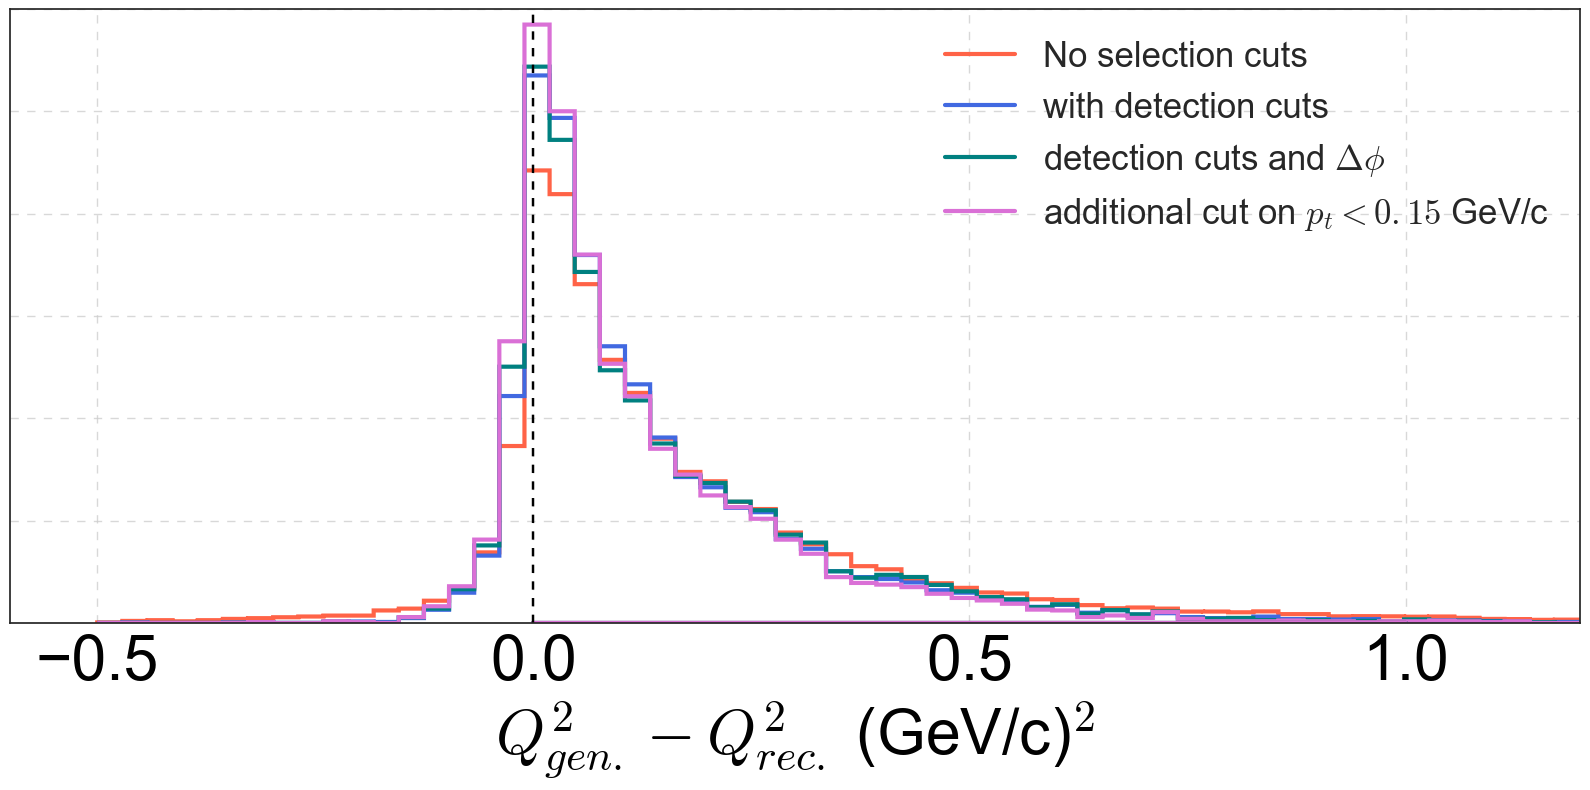

In [35]:
# reconstructed Q2 before and after the cuts
bins = np.linspace(-0.5,1.2,60)
fig_reco=plt.figure(figsize=(16,8))
ax_reco = fig_reco.add_subplot(111)
for cut_name,label,color in zip(cuts,labels,colors):
    sample = reduced_MCbnbMCcosmicSamples[cut_name]['1mu-1p']
    truth_Q2 = sample['closest_genie_Q2']
    reco_Q2 = sample['reco_Q2']
    dQ2 = truth_Q2 - reco_Q2
    h,bins,_=plt.hist( dQ2 , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    plt.plot([0,0],'-',color=color,label=label,linewidth=3)
ax_reco.plot([0,0],ax_reco.get_ylim(),'--',color='black')
set_axes(ax_reco,'$Q^{2}_{gen.} - Q^{2}_{rec.}$ (GeV/c)$^2$',ticks_color='black',fontsize=45,do_add_grid=True)
ax_reco.legend(loc='upper right',fontsize=25)
ax_reco.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
fig_reco.savefig(figures_path+'Q2_reco_before_after_cuts.pdf')

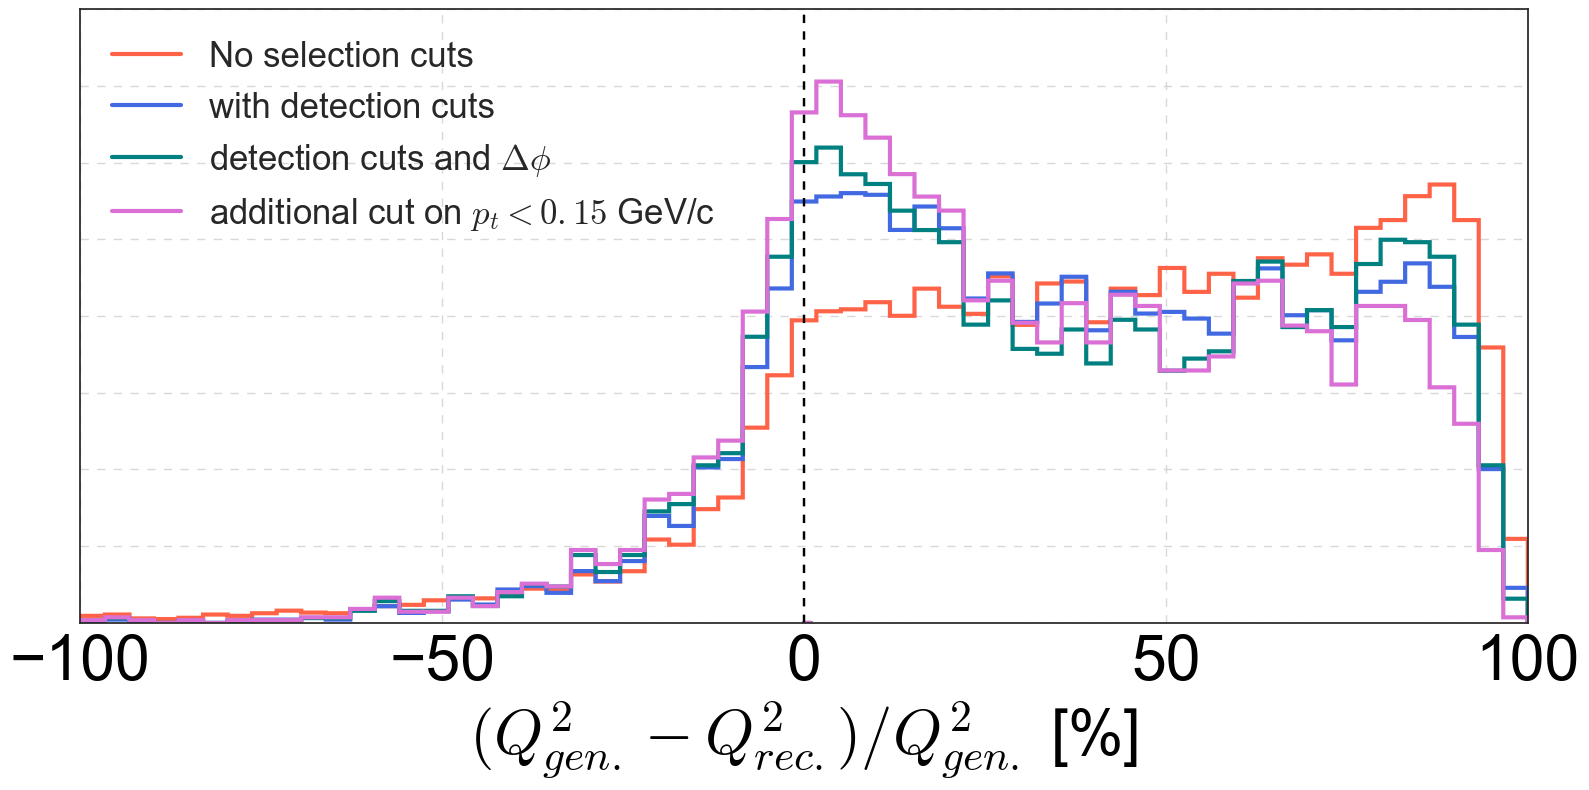

In [36]:
# reconstructed Q2 before and after the cuts
bins = np.linspace(-100,100,60)
fig_reco=plt.figure(figsize=(16,8))
ax_reco = fig_reco.add_subplot(111)
for cut_name,label,color in zip(cuts,labels,colors):
    sample = reduced_MCbnbMCcosmicSamples[cut_name]['1mu-1p']
    truth_Q2 = sample['truth_Q2']
    reco_Q2 = sample['reco_Q2']
    dQ2 = truth_Q2 - reco_Q2
    ratio = 100*dQ2/[Q2 if Q2>0.01 else 0.01 for Q2 in truth_Q2]
    h,bins,_=plt.hist( ratio , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    plt.plot([0,0],'-',color=color,label=label,linewidth=3)
ax_reco.plot([0,0],ax_reco.get_ylim(),'--',color='black')
set_axes(ax_reco,'$(Q^{2}_{gen.} - Q^{2}_{rec.})/Q^{2}_{gen.}$ [%]',ticks_color='black',fontsize=45,do_add_grid=True)
ax_reco.legend(loc='upper left',fontsize=25)
ax_reco.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
fig_reco.savefig(figures_path+'Q2_reco_ratio_before_after_cuts.pdf')